In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [217]:
data=pd.read_csv("E:/Dataset/train_linear.csv") # to read dataset
data.dropna(inplace=True) #to remove Nan values
x=data.iloc[:,0]
y=data.iloc[:,1]

In [219]:
data.info() # give info about non-null count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42) # to split train and test data

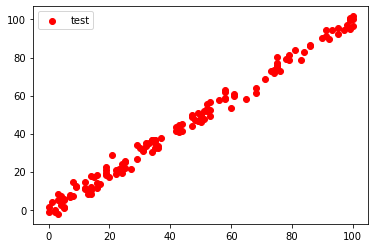

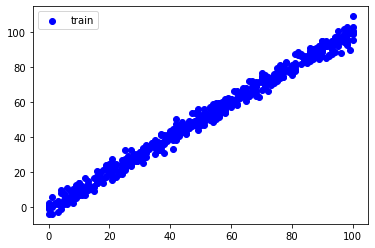

In [236]:
plt.scatter(x_test,y_test,color='r',label='test')
plt.legend()
plt.show()
plt.scatter(x_train,y_train,color='b',label='train')
plt.legend()
plt.show()

In [237]:
class linear():   #Linear Regression Class
    def __init__(self):
                 self.w=np.random.rand()
                 self.b=0
                    
    def hypothesis(self,x):
          return self.w*x + self.b
        
    def loss(self,X,Y):
            costvalue=(1/2)*np.sum((self.hypothesis(X)-Y)**2)
            return costvalue
    
    def fit(self,X,Y,lr=0.001,epochs=1000):
                cost_list=list()
                for i in range(1,epochs+1):
                            dw,db=0,0
                            y_pred=self.hypothesis(X)
                            cost=self.loss(X,Y)
                            cost_list.append(cost)
                            if(cost>0):
                                    dw=np.sum((y_pred-Y)*X)
                                    db=np.sum((y_pred-Y))
                                    self.w-= lr*dw/len(X)
                                    self.b-= lr*db/len(X)
                            else:
                                 break
                            
                plt.plot(range(1,epochs+1),cost_list,c='b',linestyle='dashed')
                plt.show()
                
                return (self.w,self.b)
            
    
    def predict(self,X):
            y_pred=list()
            for x in X:
                          y_p=self.hypothesis(x)
                          y_pred.append(y_p)
            predicted= np.array(y_pred).reshape(-1,1)
            return predicted.flatten()  
        
    
           
    
              

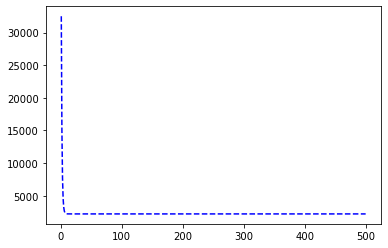

In [238]:
obj=linear()
w,b=obj.fit(x_train,y_train,lr=0.0001,epochs=500)


In [239]:
predict=obj.predict(x_test)

In [240]:
predict.shape

(140,)

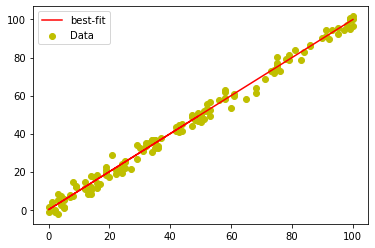

In [241]:
plt.scatter(x_test,y_test,color='y',label='Data')
plt.plot(x_test,predict,color='r',label='best-fit')
plt.legend()

In [242]:
Compare_data=pd.DataFrame({"act":y_test,"pred":predict})
Compare_data

,act,pred
158,96.623279,99.977505
500,94.296334,96.978224
397,14.558961,11.998584
155,86.821321,85.980859
322,94.367790,90.979661
...,...,...
24,83.027722,83.981338
219,43.647650,41.991398
432,34.072783,28.994512
282,44.981034,43.990919


In [243]:
error=mean_squared_error(predict,y_test)  # metric to calculate error value
error

7.758887921309825